# Práctica: Introducción a SEM

> Requiere cargar el archivo ["Path_Ingram.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/SEM/Path_Ingram.sav) en el repositorio local.

Eres parte de un equipo de investigación de psicología educativa enfocado en temas de educación superior. Actualmente tu grupo está validando el modelo teórico de Ajzen sobre el comportamiento planificado en el contexto de las postulaciones a un programa de educación superior. 

El modelo de comportamiento planificado consta de los siguientes constructos:

- Attitude: Actitudes (evaluaciones positivas o negativas) hacia el comportamiento.
- Intent: Intención de iniciar el comportamiento.
- Behavior: Ejecución del comportamiento.
- SubNorm: Percepción de presión social para realizar el comportamiento.
- Control de comportamiento percibido (PBC): Grado en el que las personas identifican que las oportunidades y recursos necesarios están disponibles para ejectuar el comportamiento.

In [1]:
!pip install pyreadstat
!pip install semopy

In [2]:
import pandas as pd
df = pd.read_spss("Path_Ingram.sav")
df

,Attitude,SubNorm,PBC,Intent,Behavior
0,33.0,46.0,50.0,21.0,59.0
1,30.0,53.0,50.0,17.0,36.0
2,37.0,30.0,45.0,14.0,44.0
3,29.0,27.0,38.0,15.0,35.0
4,36.0,55.0,48.0,15.0,62.0
5,42.0,37.0,41.0,21.0,60.0
6,27.0,14.0,34.0,18.0,38.0
7,35.0,55.0,40.0,18.0,38.0
8,35.0,55.0,47.0,19.0,68.0
9,27.0,57.0,42.0,15.0,42.0


Considerando el siguiente modelo estructural:

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/SEM/Ajzen.png" alt="SEM Ajzen">
</p>

1. Genera un diagrama de ruta que represente las relaciones entre los constructos.
> Sugerencia: Utiliza la función `semplot` disponible en el paquete `semopy`.

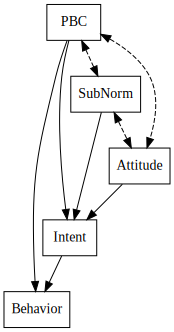

In [3]:
## Path diagram with python
import semopy

desc = '''

# Structual
Intent ∼ Attitude + SubNorm + PBC 
Behavior ∼ PBC
Behavior ∼ Intent

# Covariances
SubNorm ∼∼ PBC
Attitude ∼∼ PBC
Attitude ∼∼ SubNorm

'''
g = semopy.semplot(desc, "out.png", plot_covs=True)
g

2. Ajusta el modelo a los datos disponibles y explora los estadísticos de bondad de ajuste.

In [4]:
model = semopy.Model(desc)
res = model.fit(df)

In [5]:
stats = semopy.calc_stats(model)
print(stats.T)

                    Value
DoF              5.000000
DoF Baseline    13.000000
chi2             0.861589
chi2 p-value     0.972940
chi2 Baseline  136.416010
CFI              1.033532
GFI              0.993684
AGFI             0.983579
NFI              0.993684
TLI              1.087184
RMSEA            0.000000
AIC             19.971280
BIC             40.914726
LogLik           0.014360


3. Evalúa la significancia, magnitud y signo de los parámetros del modelo. 

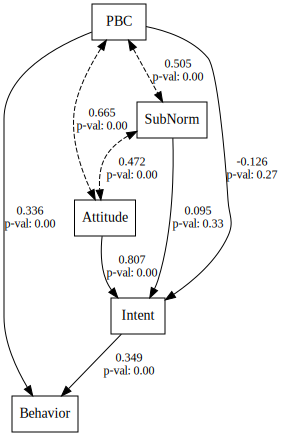

In [6]:
g = semopy.semplot(model, "out.png", plot_covs=True, std_ests=True)
g

In [7]:
estimates = model.inspect(std_est=True)
estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,Intent,~,Attitude,0.444199,0.806540,0.061611,7.209728,5.606626e-13
1,Intent,~,SubNorm,0.029482,0.094768,0.030115,0.978975,3.275926e-01
2,Intent,~,PBC,-0.063566,-0.126450,0.057461,-1.106238,2.686236e-01
3,Behavior,~,PBC,0.734449,0.335988,0.257400,2.853336,4.326280e-03
4,Behavior,~,Intent,1.519290,0.349388,0.512038,2.967141,3.005830e-03
5,SubNorm,~~,PBC,46.660417,0.505228,7.877157,5.923510,3.151418e-09
6,Attitude,~~,PBC,34.695833,0.665082,3.122169,11.112735,0.000000e+00
7,Attitude,~~,SubNorm,39.758139,0.471640,7.564002,5.256230,1.470381e-07
8,Intent,~~,Intent,5.779991,0.400191,1.055277,5.477226,4.320463e-08
9,Behavior,~~,Behavior,179.577017,0.657547,32.786128,5.477226,4.320463e-08


In [8]:
semopy.report(model, "Ingram")

4. ¿Se valida el modelo estructural sugerido? ¿Qué puedes concluir?